# *Vertical FDI: Economic Modeling + Analysis*
### Author: Drew Lesh

This notebook explores the effects of vertical integration in a supply chain with a greek machine producer and a slovenian ball bearing supplier.

In [ ]:
#import
import matplotlib.pyplot as plt
import pandas as pd
from model import separated_equilibrium, integrated_equilibrium, transfer_pricing_equilibrium, buy_at_cost_equilibrium, DEFAULT_PARAMS_VFDI

## Project Context:

This project analyzes foreign direct investment (FDI) and integration in a simple supply chain:

- **Slovenian supplier (upstream)**: produces ball bearings at a cost of 6 per unit.
- **Greek firm (downstream)**: produces machiens using 2 ball bearings per machine, with an additional cost of 4 per machine.

Machines are sold according to demand curve:
    
    P = 240 - 2Q

Comparisons:
1. **Separated scenario**: independent monopolists(double marginalization occurs)
2. **Integrated Scenario**: Greek firm acquires the Slovenian supplier(vertical integration)
3. **Transfer Pricing Scenario**: Internal price setting
4. **Buy-at-Cost**: Downstream gets all profits, bearings sold at marginal cost.

The goal is to show how integration affects quantities, prices and profits.

# Equilibriums

In [2]:
# Run the Models
sep = separated_equilibrium() # independent firms
intg = integrated_equilibrium() # Veritcal integration (MNC)
transfer = transfer_pricing_equilibrium(target_pi_up=sep['pi_up'])
at_cost = buy_at_cost_equilibrium()

# Results Table

In [3]:
# Results Table
results = pd.DataFrame({
    "Scenario": [
        'Separated', 
        'Integrated',
        'Transfer Pricing',
        'Buy at Cost'
    ],
    "Quantity (Q_machines)": [
        sep["Q"],
        intg["Q"],
        transfer['Q'],
        at_cost['Q']
    ],
    "Quantity (Q_bearings)": [ # k = 2
        sep['Q']*2,
        intg['Q']*2, 
        transfer['Q']*2,
        at_cost['Q']*2
    ],
    "Price (P_machine)": [
        sep["P"],
        intg["P"],
        transfer["P"],
        at_cost["P"]
    ],
    "Profit Downstream (Greek)": [
        sep['pi_down'],
        intg['pi'],
        transfer['pi_down'],
        at_cost['pi_down']
    ],
    "Profit Upstream (Slovenian)": [
        sep['pi_up'],
        0,
        transfer['pi_up'],
        at_cost['pi_up']
    ],
    "Total Profit": [
        sep['pi_total'],
        intg['pi'],
        transfer['pi_total'],
        at_cost['pi_total']
    ]
})

results

,Scenario,Quantity (Q_machines),Quantity (Q_bearings),Price (P_machine),Profit Downstream (Greek),Profit Upstream (Slovenian),Total Profit
0,Separated,28.0,56.0,184.0,1568.0,3136.0,4704.0
1,Integrated,56.0,112.0,128.0,5272.0,0.0,5272.0
2,Transfer Pricing,43.5,87.0,153.0,3784.5,2175.0,4959.5
3,Buy at Cost,56.0,112.0,128.0,6272.0,0.0,5272.0


# Visualizations

## Total Profit Comparison

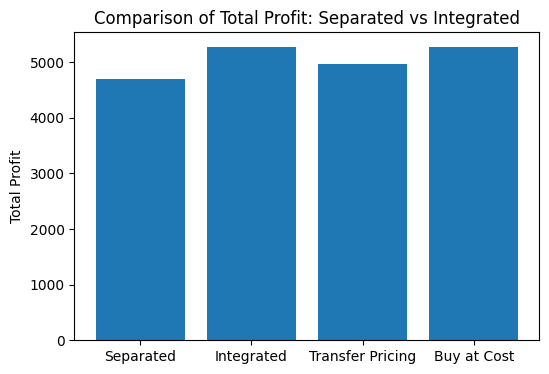

In [4]:
# Bar Chart - Total Profit
plt.figure(figsize=(6,4))
plt.bar(results['Scenario'], results['Total Profit'])
plt.ylabel('Total Profit')
plt.title('Comparison of Total Profit: Separated vs Integrated')
plt.show()

This chart compares the total profits (upstream + downstream) under different market and integration scenarios:

- **Separated (Independent Firms)**: Total profit is around 4,700. The upstream and downstream firms both mark up their prices, which reduces the combined profit due to double marginalization.

- **Integrated (MNC)**: Total profit increases to 5,272. Vertical integration allows the Greek firm to internalize upstream profits, reducing the impact of double marginalization and increasing overall profitability.

- **Transfer Pricing**: Total profit is about 4,960. Setting the upstream price to achieve a specific target profit can sometimes reduce overall profitability because the downstream firm’s profit is constrained by the transfer price.

- **Buy-at-Cost**: Total profit is the highest at 5,272, same as Integrated. When the downstream firm purchases inputs at upstream marginal cost, all potential profit is captured by the downstream firm, completely eliminating the double marginalization effect. The integrated model represents a profit maximizing quantity, so Buy-at-Cost profit = MNC profit in this model.

## Upstream vs Downstream Profits

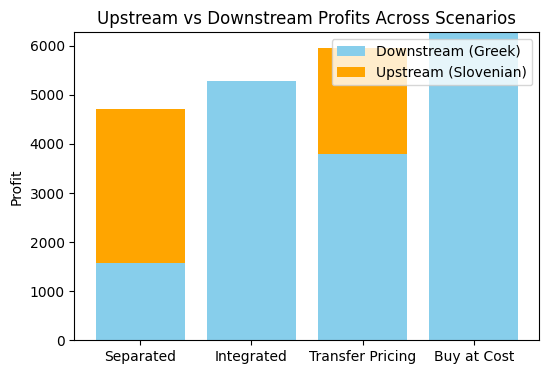

In [7]:
plt.figure(figsize=(6,4))
plt.bar(results['Scenario'], results['Profit Downstream (Greek)'], label='Downstream (Greek)', color='skyblue')
plt.bar(results['Scenario'], results['Profit Upstream (Slovenian)'], bottom=results['Profit Downstream (Greek)'], 
        label='Upstream (Slovenian)', color='orange')

plt.ylabel('Profit')
plt.title('Upstream vs Downstream Profits Across Scenarios')
plt.legend()
plt.show()


This chart shows the distribution of profits between upstream (Slovenian) and downstream (Greek) firms under different scenarios of vertical FDI. Fixed Costs aren't shown because they are subtracted as a total from an MNC:

- **Separated (Independent Firms)**: Both upstream and downstream are monopolists. Each firm sets its own price, so both earn positive profits. This is shown as a stacked bar.

- **Integrated (MNC)**: The Greek firm acquires the Slovenian supplier. Upstream profit is internalized, so only the downstream (combined) profit is shown.

- **Transfer Pricing (MNC)**: The Greek firm owns the Slovenian supplier and sets an internal price for ball bearings to allocate profits between the two divisions. This shows how total profit can be divided within a single company depending on internal pricing strategy.

- **Buy-at-Cost (MNC)**: The Greek firm owns the upstream supplier and prices inputs at marginal cost. This demonstrates the scenario where the downstream division captures all the profit, maximizing total firm efficiency.

The stacked bars highlight the double marginalization problem: in independent firms, upstream and downstream both mark up prices, reducing total profit. Vertical integration and buy-at-cost scenarios eliminate or reduce this effect.

## Machine Quantity Comparison

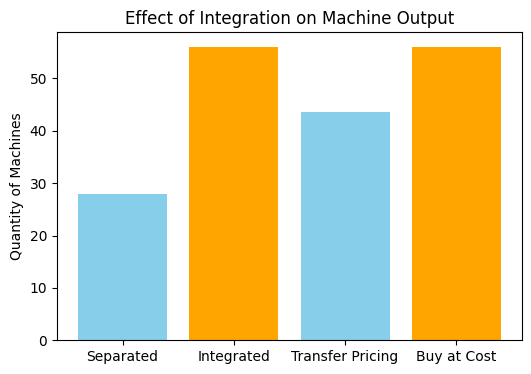

In [6]:
plt.figure(figsize=(6,4))
plt.bar(results['Scenario'], results['Quantity (Q_machines)'], color=['skyblue', 'orange'])
plt.ylabel('Quantity of Machines')
plt.title('Effect of Integration on Machine Output')
plt.show()

# Final Summary: Vertical FDI Analysis
This analysis examines the interaction between a downstream firm in Greece (producing machines) and an upstream firm 
in Slovenia (producing ball bearings) under different market structures and integration scenarios. Using both analytical
and numerical approaches, we compared independent firms, a vertically integrated multinational corporation (MNC),
and two internal pricing strategies: transfer pricing and buy-at-cost.

### Key Findings
1. Independent Firms (Seperated Equilibrium)
- Both the upstream and downstream firms mark up prices independently.
- Total profits are lower due to double marginalization, where each firm adds its own margin on the input or final good.
- Machine output is limited relative to the integrated scenarios.

2. Vertical Integration (Integrated Equilibrium / MNC)
- The Greek firm acquires the Slovenian supplier, eliminating the upstream margin in pricing decisions.
- Total profits increase, and machine output rises compared to the separated case.
- Fixed integration costs slightly reduce net profit but do not offset the gains from coordination.

3. Transfer Pricing (Internal Price Set to Target Upstream Profit):
- The MNC sets an internal price for ball bearings to achieve a specific upstream profit.
- Both upstream and downstream units earn profit, though total profit is slightly lower than full integration at marginal cost.
- This scenario represents partial mitigation of double marginalization, as upstream and downstream coordination is present but constrained by the pricing target.

4. Buy-at-Cost (Internal Transfer at Marginal Cost)
- The downstream plant buys ball bearings at the upstream marginal cost.
- Upstream profit is zero, and all profit accrues to the downstream plant.
- This scenario maximizes total profit and fully eliminates the double marginalization problem

### Double Marginalization
Phenomon where both upstream and downstream firms add independent markups on their costs, leading to higher prices and lower profit.
- Separated firm scenario demonstrates this.
- Vertical integration and buy-at-cost remove/reduce this. 

### Hold up Problem
Situation where the upstream supplier can exploit the downstream firm via threats through supply.
- The the separated equilibrium model, the Slovenian firm could 'hold up' the Greek firm.

## Conclusion
Vertical Integration clearly Improves efficiency and total profitability by addressing market failures inherent in independent upstream and downstream firms. The buy-at-cost scenario represents the upper bound of potential gains, while transfer pricing offers a realistic intermediate for MNC's looking to balance internal profit allocation. The graphical comparisons illustrate these gains and show evidence of economic rationale for vertical FDI.